# Credit Scoring Model

## Objective
### Predict an individual’s creditworthiness (whether they will default in the next 2 years) using past financial data.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [4]:
df = pd.read_csv('data/Give_Me_Some_Credit.csv')

In [5]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [10]:
df.tail()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149997,149998.0,0.0,0.246044,58.0,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0.0
149998,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0
149999,150000.0,0.0,0.850283,64.0,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,29731.0,NaN,NaN,NaN,NaN,NaN


In [122]:
df.shape

(150000, 13)

In [8]:
df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
df.dtypes

ID                                      float64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  float64
 1   SeriousDlqin2yrs                      150000 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120270 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 8   NumberOfTimes90DaysLate               150000 non-null  float64
 9   NumberRealEstateLoansOrLines          150000 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 11  

In [14]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202700e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670413e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438477e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [15]:
df.isnull().sum()

ID                                          2
SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome                           29732
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3926
dtype: int64

#### Target = SeriousDlqin2yrs
0 = No Default                                                                       
1 = Default

In [ ]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0.0    139974
1.0     10026
Name: count, dtype: int64

In [30]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0.0    139974
1.0     10026
Name: count, dtype: int64

### Target Variable Distribution
This shows the class imbalance clearly

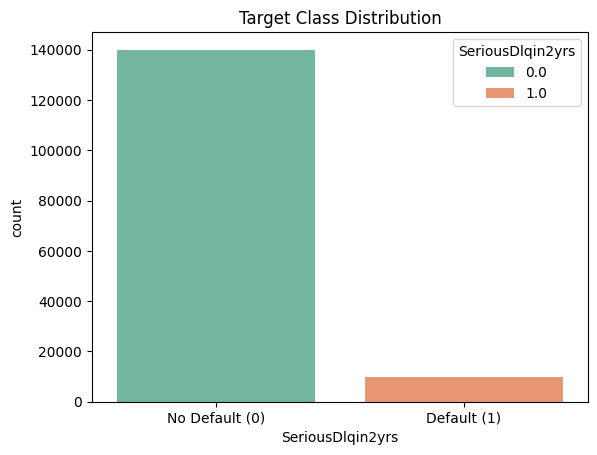

In [31]:
sns.countplot(x='SeriousDlqin2yrs', data=df, hue='SeriousDlqin2yrs', palette='Set2')
plt.title('Target Class Distribution')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.show()

This plot clearly shows that the dataset is highly imbalanced, with a disproportionately small number of "default" cases compared to "no default" cases. This is a critical insight that will guide the subsequent steps in data preprocessing and model development.

### Plot Missing Values (Heatmap)

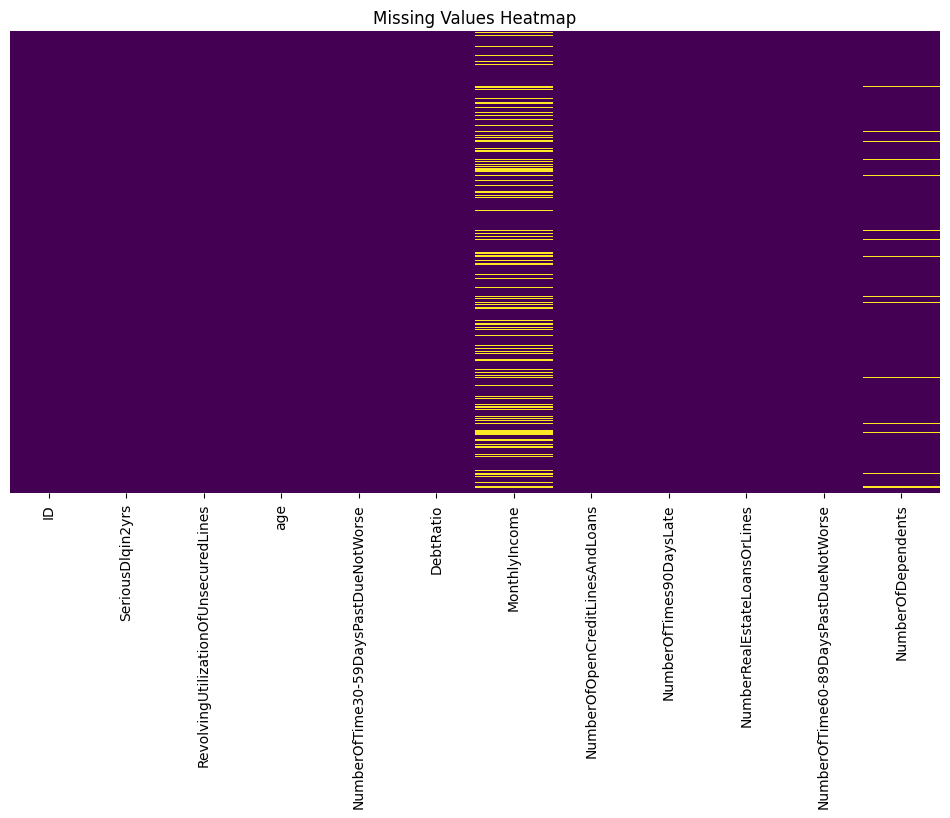

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The heatmap clearly shows that MonthlyIncome and NumberDependents are the only columns with missing values in this dataset, with MonthlyIncome having a much higher proportion of missing data than NumberDependents. This information is crucial for data preprocessing, as these missing values will need to be handled (imputed, or rows with missing values dropped) before building a machine learning model.

### Count of Missing Values (Bar Plot)
To visually see which columns have how many missing entries:

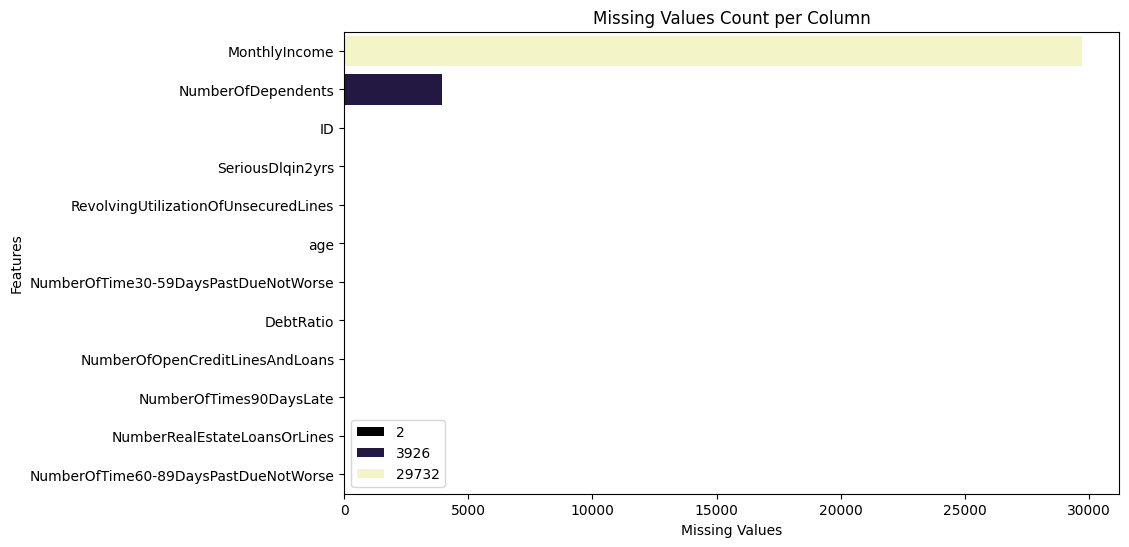

In [21]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing_counts.values, y=missing_counts.index, hue= missing_counts.values, palette='magma')
plt.title('Missing Values Count per Column')
plt.xlabel('Missing Values')
plt.ylabel('Features')
plt.show()

This plot precisely quantifies the missing data problem identified by the heatmap. It highlights MonthlyIncome and NumberOfDependents as the primary columns requiring attention for missing value imputation or handling before proceeding with data analysis or model training. The overwhelming majority of other features are largely complete.

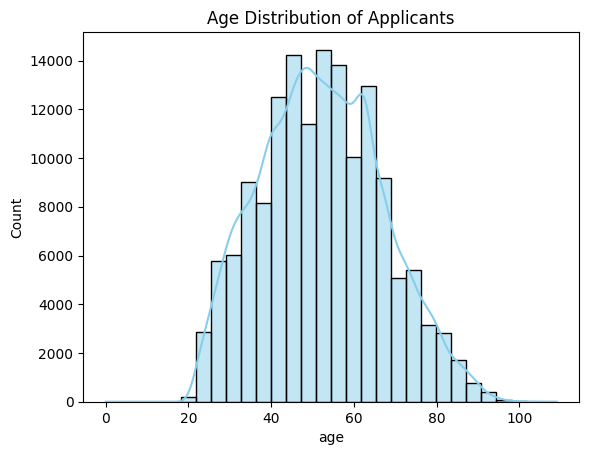

In [ ]:
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution of Applicants")
plt.show()

The plot reveals that the applicant pool is predominantly middle-aged, with a healthy spread across adult working ages. The distribution is somewhat symmetric around its peak but leans slightly towards older ages. This information is valuable for understanding the demographic profile of the dataset's subjects.

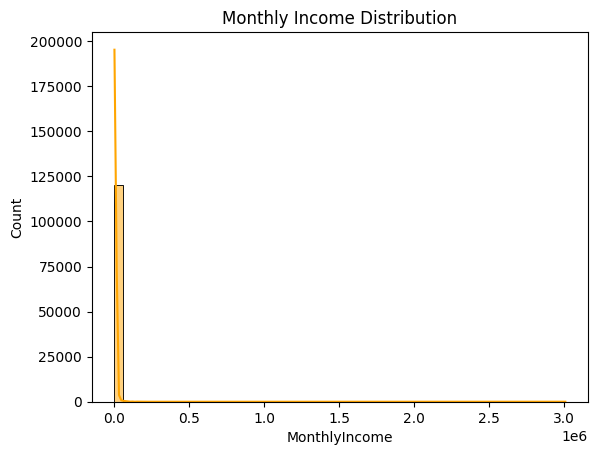

In [33]:
sns.histplot(df['MonthlyIncome'].dropna(), kde=True, bins=50, color='orange')
plt.title("Monthly Income Distribution")
plt.show()

 The monthly income distribution is severely right-skewed, with a large majority of applicants having low incomes and a few having extremely high incomes. This calls for feature engineering techniques like log transformation to improve its usability for machine learning models.

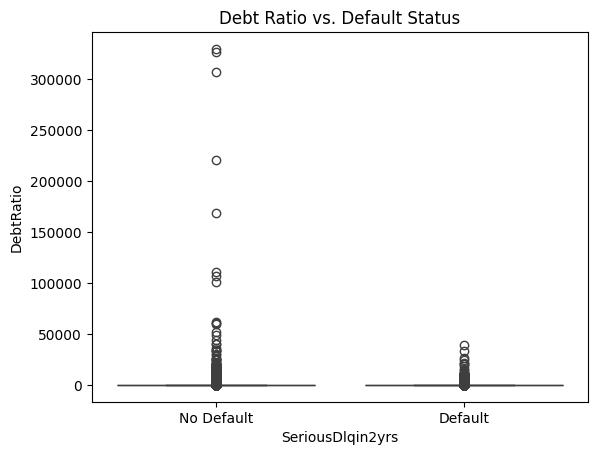

In [34]:
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=df)
plt.title("Debt Ratio vs. Default Status")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

The DebtRatio variable is highly skewed with numerous extreme outliers, for both default and non-default groups. The bulk of the data for both groups is concentrated at very low debt ratios. Effective handling of these outliers and potentially transforming the variable will be crucial for its utility in a predictive model.

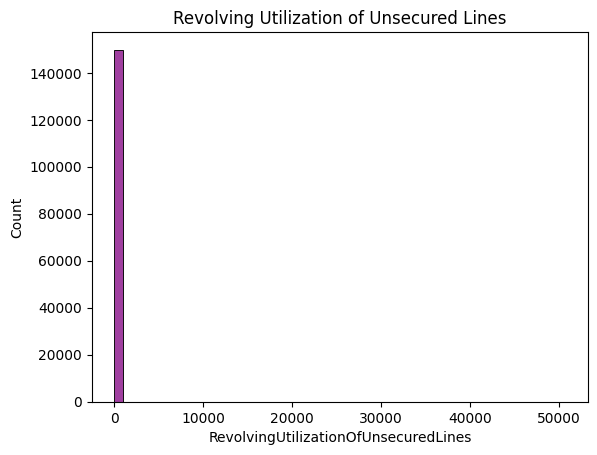

In [35]:
sns.histplot(df['RevolvingUtilizationOfUnsecuredLines'], bins=50, color='purple')
plt.title("Revolving Utilization of Unsecured Lines")
plt.show()

The "Revolving Utilization of Unsecured Lines" feature is dominated by values near zero, but also contains extreme outliers that are likely erroneous given the nature of a "utilization" ratio. Robust outlier handling and potentially feature transformation are absolutely necessary for this variable to be useful in a predictive model.

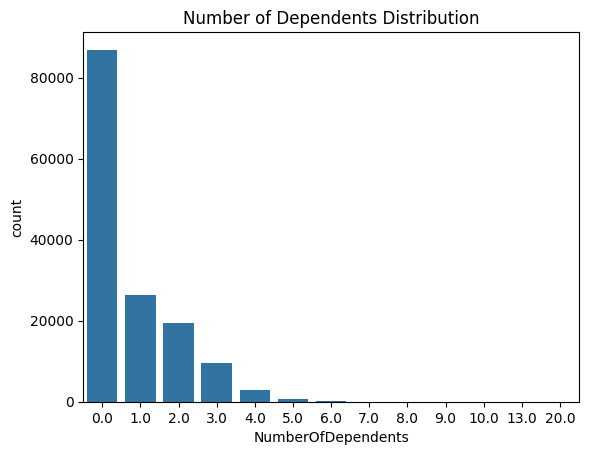

In [36]:
sns.countplot(x='NumberOfDependents', data=df)
plt.title("Number of Dependents Distribution")
plt.show()

The "Number of Dependents" variable is heavily skewed towards zero, with most applicants having no dependents. While the majority of data is concentrated at low counts, there's a long tail with a few individuals having a very high number of dependents, which might warrant outlier handling or binning. Missing values should be imputed, likely with 0.

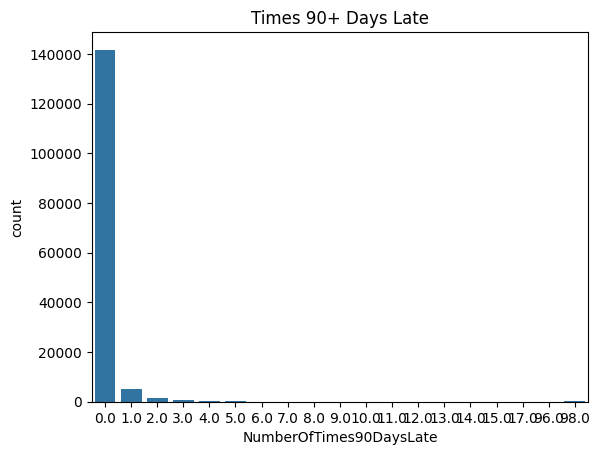

In [37]:
sns.countplot(x='NumberOfTimes90DaysLate', data=df)
plt.title("Times 90+ Days Late")
plt.show()

The "Number of Times 90+ Days Late" variable is heavily concentrated at zero, indicating that most individuals have not experienced severe delinquency. Its highly skewed nature and direct relevance to the target variable suggest it will be a powerful predictor in the model.

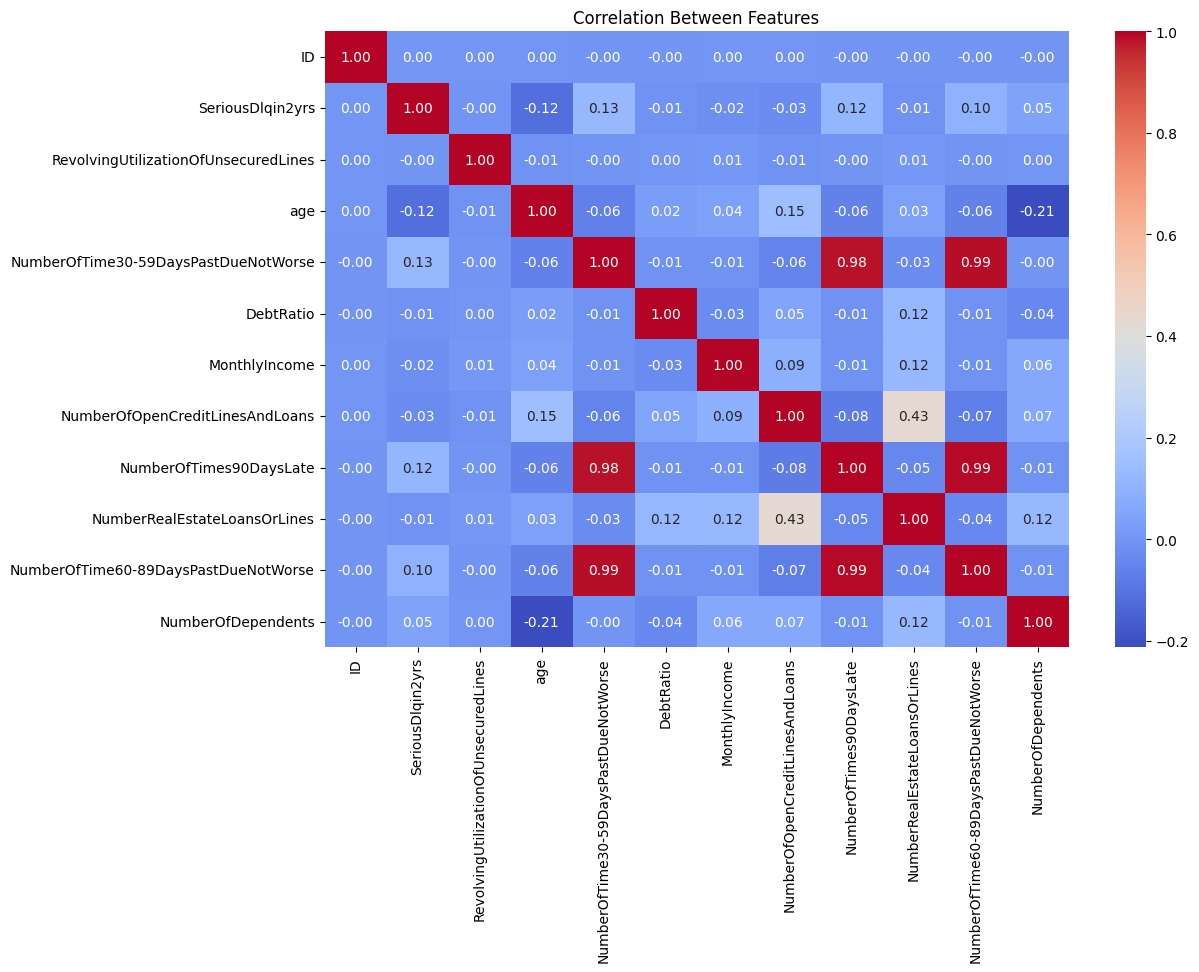

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

The correlation heatmap highlights the critical importance of the NumberOfTimes90DaysLate feature, strong multicollinearity among the delinquency count features, and generally weak linear correlations for most other features with the target variable. This analysis will guide feature selection and preprocessing steps.

Text(0.5, 1.0, 'Boxplot of Credit Utilization')

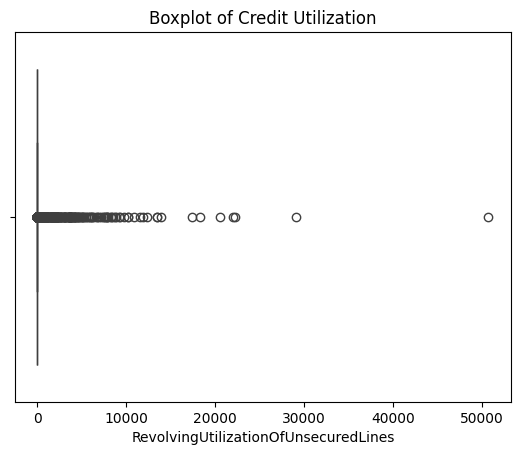

In [40]:
sns.boxplot(x=df['RevolvingUtilizationOfUnsecuredLines'])
plt.title("Boxplot of Credit Utilization")

This boxplot provides a clear and compelling visual confirmation of the severe right-skewness and the presence of numerous, highly improbable extreme outliers in the "Revolving Utilization of Unsecured Lines" variable. Addressing these outliers through capping or transformation is a critical preprocessing step before using this feature in any predictive model.

Text(0.5, 1.0, 'Boxplot of Monthly Income')

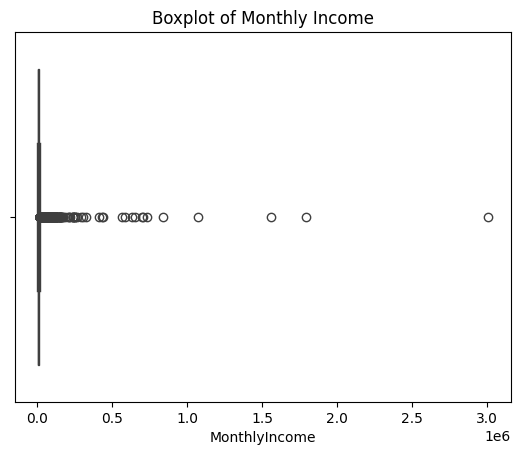

In [41]:
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Boxplot of Monthly Income")

The boxplot of MonthlyIncome confirms its severe right-skewness and the presence of numerous extreme outliers. Effective preprocessing, including handling missing values (likely with the median) and applying a transformation (like log transformation), will be essential to make this feature more suitable for machine learning algorithms.

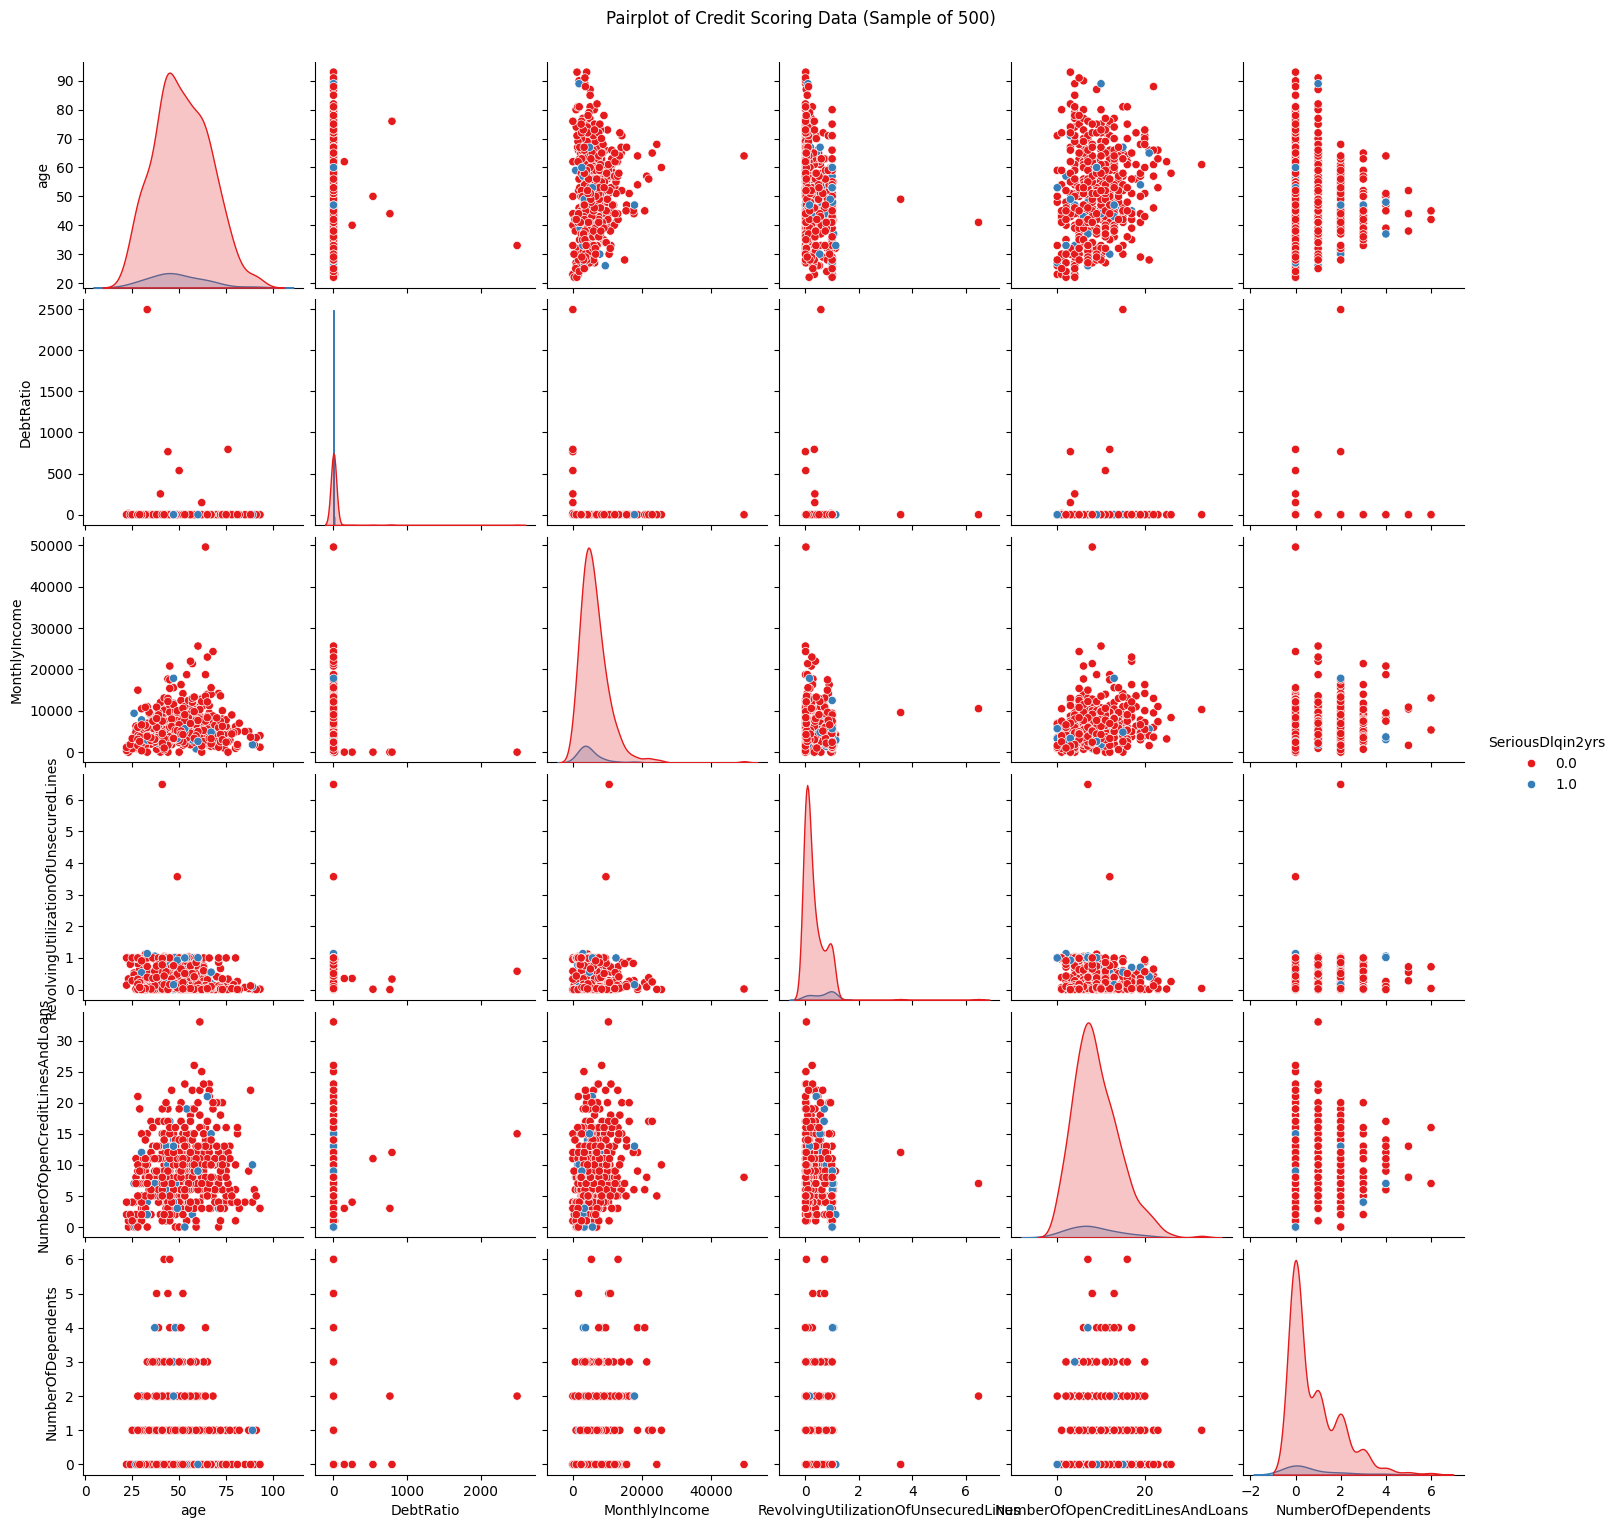

In [43]:
df_sample = df[['SeriousDlqin2yrs', 'age', 'DebtRatio', 'MonthlyIncome',
                'RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans',
                'NumberOfDependents']].dropna().sample(500, random_state=10)

sns.pairplot(df_sample, hue='SeriousDlqin2yrs', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Credit Scoring Data (Sample of 500)", y=1.02)
plt.show()

### Data Cleaning

In [60]:
df.isnull().sum()

SeriousDlqin2yrs                         2
RevolvingUtilizationOfUnsecuredLines     2
age                                      2
DebtRatio                                2
MonthlyIncome                            0
NumberOfOpenCreditLinesAndLoans          2
NumberOfTimes90DaysLate                  2
NumberRealEstateLoansOrLines             2
NumberOfDependents                       0
MonthlyIncome_log                        0
HighUtilizationFlag                      0
DebtMonthlyInteraction                   2
AgeGroup                                16
dtype: int64

In [61]:
# Drop rows where target is NaN
df = df[df['SeriousDlqin2yrs'].notna()]

In [44]:
# Drop the ID column as it's not useful for modeling
df.drop(columns=['ID'], inplace=True)

### Impute Missing Values

In [69]:
# Fill missing numerical values with median
for col in ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
            'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']:
    df[col] = df[col].fillna(df[col].median())

In [68]:
# Fill delinquency (categorical/binary) with mode (or 0)
df.loc[:, 'NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].fillna(0)
df = df.infer_objects(copy=False)

In [58]:
# Impute MonthlyIncome with median
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [ ]:
# Impute NumberOfDependents with mode 
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

#### Handle Outliers

In [49]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].clip(upper=1)

In [50]:
df['DebtRatio'] = df['DebtRatio'].clip(upper=2)

In [51]:
import numpy as np
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])  # log1p handles 0 safely

#### Address Multicollinearity

The following 3 features are highly correlated:

 - NumberOfTime30-59DaysPastDueNotWorse

 - NumberOfTime60-89DaysPastDueNotWorse

 - NumberOfTimes90DaysLate

We'll keep only NumberOfTimes90DaysLate (most severe and informative).

In [52]:
df.drop(columns=[
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse'
], inplace=True)

This reduces redundancy and simplifies the model.

#### Feature Engineering

In [ ]:
# Bin age into categories
df['AgeGroup'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], 
                        labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

In [53]:
# Create a flag for high utilization (after capping)
df['HighUtilizationFlag'] = (df['RevolvingUtilizationOfUnsecuredLines'] > 0.8).astype(int)

In [54]:
# Create interaction feature: DebtRatio * MonthlyIncome
df['DebtMonthlyInteraction'] = df['DebtRatio'] * df['MonthlyIncome']

In [71]:
df.isnull().sum()

SeriousDlqin2yrs                         0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
DebtRatio                                0
MonthlyIncome                            0
NumberOfOpenCreditLinesAndLoans          0
NumberOfTimes90DaysLate                  0
NumberRealEstateLoansOrLines             0
NumberOfDependents                       0
MonthlyIncome_log                        0
HighUtilizationFlag                      0
DebtMonthlyInteraction                   0
AgeGroup                                14
dtype: int64

#### Handle Class Imbalance with SMOTE

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Drop non-numeric or unnecessary features for x
x = df.drop(columns=['SeriousDlqin2yrs', 'AgeGroup']) # drop target + categorical
y = df['SeriousDlqin2yrs']

# Train-test split (stratified)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Apply SMOTE
smote = SMOTE(random_state=2)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [100]:
print(x_train_res.shape)
print(x_train_res.columns)

(223958, 11)
Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'MonthlyIncome_log', 'HighUtilizationFlag',
       'DebtMonthlyInteraction'],
      dtype='object')


### Train Models
1. Logistic Regression

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize model
lr = LogisticRegression(random_state=2, max_iter=1000)

# Train
lr.fit(x_train_scaled, y_train_res)

# predict
y_pred = lr.predict(x_test_scaled)

# Evaluate
print(f'Accuracy:, {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:,1]):.2f}')

Accuracy:, 0.71
Confusion Matrix:
 [[19834  8161]
 [  494  1511]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     27995
         1.0       0.16      0.75      0.26      2005

    accuracy                           0.71     30000
   macro avg       0.57      0.73      0.54     30000
weighted avg       0.92      0.71      0.78     30000

ROC-AUC Score:, 0.78


#### Model Performance Summary:

| Metric              | Value | Insight                                                                                                          |
| ------------------- | ----- | ---------------------------------------------------------------------------------------------------------------- |
| **Accuracy**        | 71%   | Overall decent, but not sufficient alone (imbalanced data).                                                      |
| **Precision (1.0)** | 16%   | Model is finding many false positives (labeling people as default risk when they’re not).                        |
| **Recall (1.0)**    | 75%   | High! It’s catching 75% of actual defaults. This is **great for credit risk**, as missing defaulters is riskier. |
| **F1-Score (1.0)**  | 0.26  | Trade-off between precision & recall still weak.                                                                 |
| **ROC-AUC Score**   | 0.78  | Good discrimination ability overall.                                                                           |


2. Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(random_state=2, max_depth=5)

# Train
dt.fit(x_train_scaled, y_train_res)

# Predict
y_pred_dt = dt.predict(x_test_scaled)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))
print(f'ROC-AUC Score: {roc_auc_score(y_test, dt.predict_proba(x_test_scaled)[:, 1]):.2f}')

Accuracy: 0.79
Confusion Matrix: 
 [[22722  5273]
 [  934  1071]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     27995
         1.0       0.17      0.53      0.26      2005

    accuracy                           0.79     30000
   macro avg       0.56      0.67      0.57     30000
weighted avg       0.91      0.79      0.84     30000

ROC-AUC Score: 0.76


### Decision Tree Classifier – Performance Summary

| Metric              | Value  | Insight                                                        |
| ------------------- | ------ | -------------------------------------------------------------- |
| **Accuracy**        | 79.31% | Improved over Logistic Regression                             |
| **Recall (1.0)**    | 53%    | Catching over half of actual defaulters. Solid improvement!  |
| **Precision (1.0)** | 17%    | Still some false positives, but expected due to imbalance.     |
| **ROC-AUC**         | 0.76   | Decent! Model can distinguish defaulters from non-defaulters.  |
| **F1-score (1.0)**  | 0.26   | Same as logistic, indicating imbalance still affects results.  |



3. Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=2, max_depth=10)  # You can tune depth or estimators

# Train
rf.fit(x_train_scaled, y_train_res)

# Predict
y_pred_rf = rf.predict(x_test_scaled)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f'ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(x_test_scaled)[:, 1]):.2f}')


Accuracy: 0.82
Confusion Matrix:
 [[23684  4311]
 [  957  1048]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     27995
         1.0       0.20      0.52      0.28      2005

    accuracy                           0.82     30000
   macro avg       0.58      0.68      0.59     30000
weighted avg       0.91      0.82      0.86     30000

ROC-AUC Score: 0.79


### Random Forest Classifier – Performance Summary

| Metric              | Value  | Insight                                                         |
| ------------------- | ------ | --------------------------------------------------------------- |
| **Accuracy**        | 82.00% | Best so far! Model is generalizing well on both classes.       |
| **Recall (1.0)**    | 52%    | Captures more than half of actual defaulters. Strong recall.  |
| **Precision (1.0)** | 20%    | Higher than Decision Tree—fewer false positives.              |
| **ROC-AUC**         | 0.79   | Best ROC-AUC so far. Good separation between classes.         |
| **F1-score (1.0)**  | 0.28   | Improved over Logistic & Decision Tree. Balance improving.    |

#### Feature Importance Plot

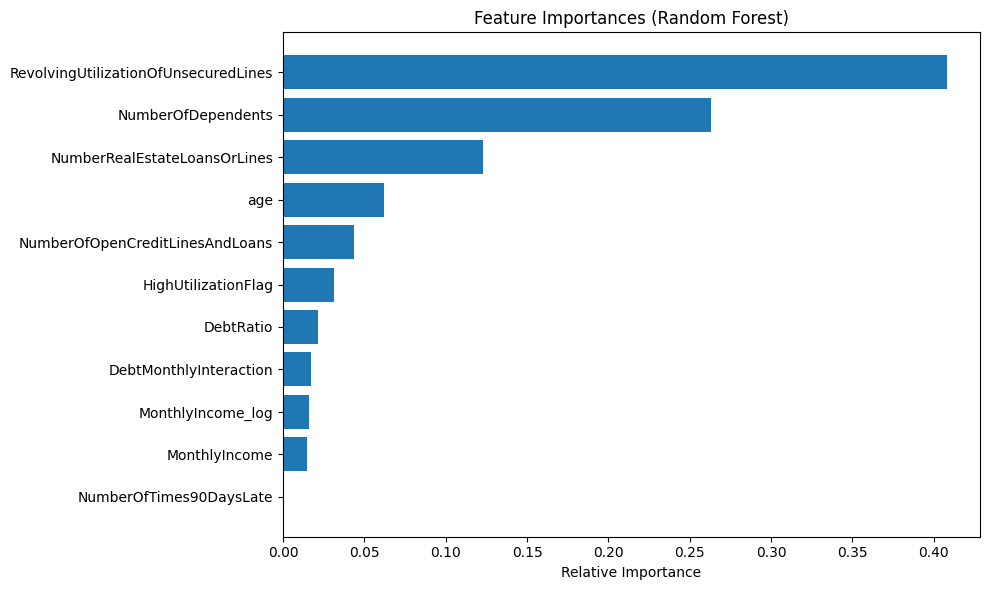

In [86]:
# Get feature importances
importances = rf.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices][::-1])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

####  Understanding This Feature:
 - Formula:                  
RevolvingUtilizationOfUnsecuredLines =
Current balance on credit lines \ Total credit limit
 
 - Typical Range:

 - Normally between 0 and 1

 - However, in this dataset you might find values >1 (indicating balance > limit) or even 0

#### RevolvingUtilizationOfUnsecuredLines is High in Feature Importance
This means:

🔹 The model (like Random Forest) found this feature very informative when deciding whether a person is likely to default.

#### Why It's Important:

 - It reflects credit behavior directly:
People using too much of their available credit are riskier borrowers.

 - It's a strong signal of financial stress, so models use it heavily to classify creditworthiness.

#### ROC-AUC Curve Plot

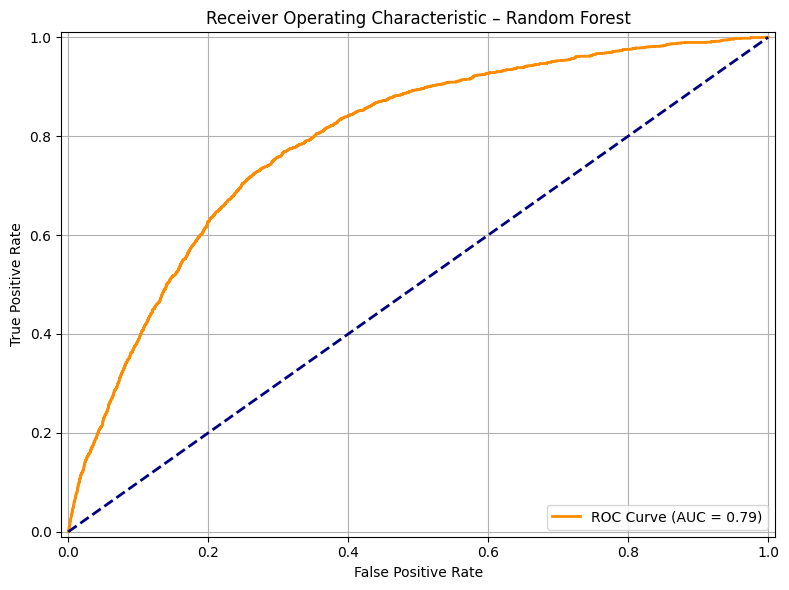

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = rf.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic – Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

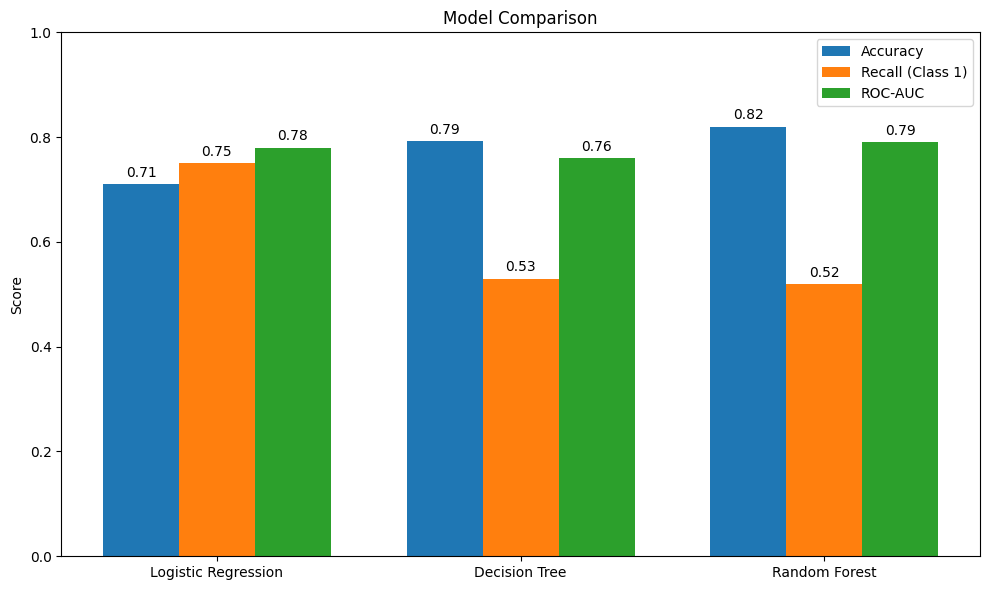

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from your results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.71, 0.7931, 0.82]
recall_1 = [0.75, 0.53, 0.52]
roc_auc = [0.78, 0.76, 0.79]

x = np.arange(len(models))  # label locations
width = 0.25  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x, recall_1, width, label='Recall (Class 1)')
bars3 = ax.bar(x + width, roc_auc, width, label='ROC-AUC')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Model Performance Comparison Table

| Metric                  | Logistic Regression | Decision Tree | Random Forest |
| ----------------------- | ------------------- | ------------- | ------------- |
| **Accuracy**            | 71%                 | 79.31%        | **82%**       |
| **Recall (Class 1)**    | **75%**             | 53%           | 52%           |
| **Precision (Class 1)** | 16%                 | 17%           | **20%**       |
| **F1-Score (Class 1)**  | 0.26                | 0.26          | **0.28**      |
| **ROC-AUC Score**       | **0.78**            | 0.76          | 0.79          |
| **Support (Class 1)**   | 2005                | 2005          | 2005          |

Insights:

 - Random Forest gave the best overall accuracy and highest F1-score, showing a more balanced trade-off.

 - Logistic Regression had the highest recall, meaning it detected more actual defaulters (but at the cost of precision).

 - Decision Tree struck a middle ground, useful if interpretability is needed.

#### Save the Model & Scaler

In [89]:
import joblib

# Save model
joblib.dump(rf, 'random_forest_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [94]:
x = df.drop('SeriousDlqin2yrs', axis=1)


In [98]:
print(x.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'MonthlyIncome_log', 'HighUtilizationFlag',
       'DebtMonthlyInteraction', 'AgeGroup'],
      dtype='object')


#### Create the Prediction Function

In [119]:
import numpy as np
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load('E:/Credit_scoring_model/models/random_forest_model.pkl')
scaler = joblib.load('E:/Credit_scoring_model/models/scaler.pkl')

def predict_user_default(user_input_list):
    # Unpack user inputs
    (
        credit_usage,
        age,
        debt_ratio,
        monthly_income,
        open_credit,
        times_late,
        real_estate_loans,
        dependents
    ) = user_input_list

    # Feature engineering
    monthly_income_log = np.log1p(monthly_income)
    high_util_flag = 1 if credit_usage > 0.8 else 0
    debt_income_interaction = debt_ratio * monthly_income

    # Final ordered list
    final_features = [
        credit_usage,
        age,
        debt_ratio,
        monthly_income,
        open_credit,
        times_late,
        real_estate_loans,
        dependents,
        monthly_income_log,
        high_util_flag,
        debt_income_interaction
    ]

    # Column names
    feature_names = [
        'RevolvingUtilizationOfUnsecuredLines',
        'age',
        'DebtRatio',
        'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans',
        'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines',
        'NumberOfDependents',
        'MonthlyIncome_log',
        'HighUtilizationFlag',
        'DebtMonthlyInteraction'
    ]

    # Create proper DataFrame
    input_df = pd.DataFrame([final_features], columns=feature_names)

    # Scale
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]

    return "Default Risk ❌" if prediction == 1 else "No Default ✅"


In [ ]:
user_input = [0.75, 40, 0.4, 5000, 6, 1, 0, 1]
result = predict_user_default(user_input)
print(result)

Default Risk ❌


In [121]:
test_input_1 = [0.12, 35, 0.20, 5500, 6, 0, 1, 1]
result = predict_user_default(test_input_1)
print(result)

No Default ✅
